# Campos de velocidades
---
Alguns exemplos de campos de velocidade. 


In [3]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("ggplot")

X = 3000     ## distancia em metros
Z = 3000     ## profundidade em metros
T = 2        ## tempo total em segundos

dx = 10      ## largura da malha
dz = dx      ## largura da malha
dt = 0.00025 ## passo no tempo

Nx = int(X/dx)    ## numero de colunas
Nz = int(Z/dz)    ## numero de linhas

fpico = 40   ## frequencia de pico em Hz
xs = 1500    ## posicao da fonte na direcao x em metros
zs = 250     ## posicao da fonte na direcao z em metros

vel = np.zeros((Nz, Nx), int) ## matriz de velocidades

In [4]:
def modelo_planos_paralelos(vel):
    
    for i in range(Nx):
    
        for j in range(int(Nz/3)):
            vel[j][i] = 1500

        for j in range(int(Nz/3), int(2*Nz/3)):
            vel[j][i] = 2000

        for j in range(int(2*Nz/3), Nz):
            vel[j][i] = 3000

    return vel

def modelo_semicirculo(vel):
    
    for i in range(Nx):
        for j in range(Nz):

            raio = Nx/2
            circulo = -np.sqrt((raio**2)-(i - raio)**2) + Nz

            if j < Nz/3:
                vel[j][i] = 1500

            elif j < circulo and j >= Nz/3:
                vel[j][i] = 2000

            else:
                vel[j][i] = 3000
    
    return vel

def modelo_camada_dobrada(vel):
    
    raio = Nz/2;
    
    for i in range(Nx):

        if i < raio:
            area = np.sqrt(raio**2 - i**2) + Nz/2
        else:
            area = -np.sqrt(raio**2 - (i - Nx)**2) + Nz/2

        for j in range(Nz):

            if j < area:
                vel[j][i] = 2500

            else:
                vel[j][i] = 3500
    
    return vel

def modelo_reservatorio(vel):
    
    me = 70

    for i in range(Nx):
        for j in range(Nz):

            y = (8*me**3)/(i**2 + 4*me**2) ## regiao do reservatorio

            if j <= y:
                vel[j][i] = 1500
            elif j > y and j < me:
                vel[j][i] = 2000
            elif j >= me and j < y + 50 and j < 147:
                vel[j][i] = 2500
            elif j >= 147 and j < y + 50:
                vel[j][i] = 3000
            elif j >= y + 50 and j < 230:
                vel[j][i] = 3500
            else:
                vel[j][i] = 4000
                
    return vel
        
def visualizar_campos(vel):
    
    plt.figure(figsize=(7, 7))
    im = plt.imshow(vel, cmap='viridis')
    plt.colorbar(im)
    plt.grid(False)
    plt.show()

    return

def salva_arquivo(nome_do_arquivo, X, Z, T, dx, dz, dt, fpico, xs, zs, vel):

    file = open(nome_do_arquivo, "w")
    
    file.write("{} {} {} {} {} {} {} {} {}\n".format(X, Z, T, dx, dz, dt, fpico, xs, zs))
    
    for j in vel:
        for i in j:
            file.write("{} ".format(i))
        
    file.close()
    
    return


In [5]:
## salvando arquivo de velocidades

vel = modelo_reservatorio(vel)



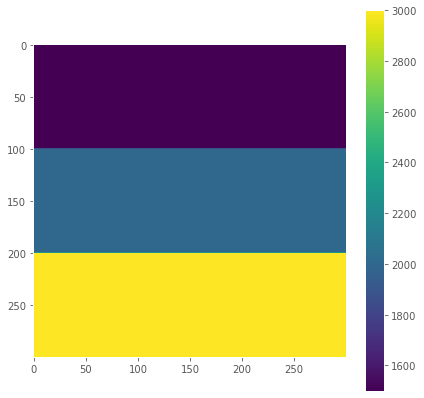

In [6]:
## camadas paralelas
vel = modelo_planos_paralelos(vel)
visualizar_campos(vel)
salva_arquivo("planos_paralelos.txt", X, Z, T, dx, dz, dt, fpico, xs, zs, vel)

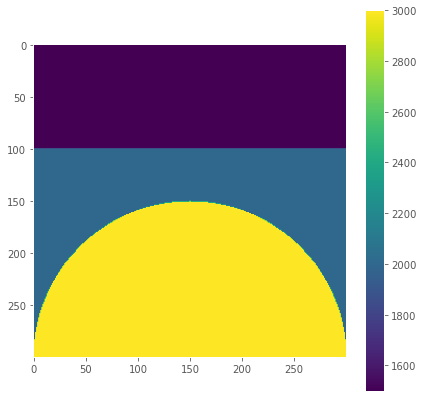

In [7]:
## semicírculo
vel = modelo_semicirculo(vel)
visualizar_campos(vel)
salva_arquivo("semicirculo.txt", X, Z, T, dx, dz, dt, fpico, xs, zs, vel)

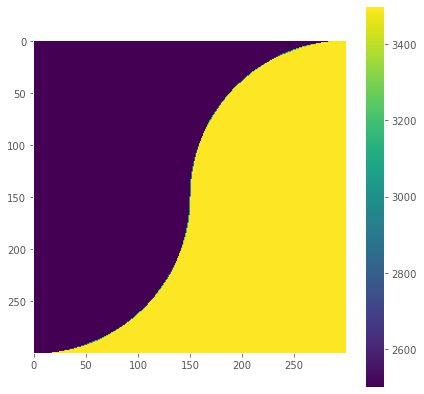

In [8]:
## camada dobrada
vel = modelo_camada_dobrada(vel)
visualizar_campos(vel)
salva_arquivo("camada_dobrada.txt", X, Z, T, dx, dz, dt, fpico, xs, zs, vel)

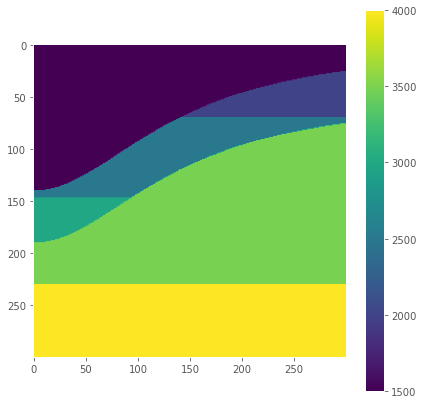

In [9]:
## reservatorio
vel = modelo_reservatorio(vel)
visualizar_campos(vel)
salva_arquivo("reservatorio.txt", X, Z, T, dx, dz, dt, fpico, xs, zs, vel)